In [24]:
import matplotlib.pyplot as plt
def part1(Xin,istar):
    """
    Sort list of integers in non-decreasing order
    Input:
    Xin: List of N integers
    istar: integer between 0 and N-1 (0<=istar<=N-1)
    Output:
    X: Sorted list
    """ 
    X = Xin.copy() 
    for i,x in enumerate(X[1:],1):
        if i<=istar:
            ind = 0
            for j in range(i-1,-1,-1):
                if x>=X[j]:
                    ind = j+1
                    break                   
        else:
            a = 0
            b = i-1
            while a <= b:
                c = (a+b) // 2
                if X[c] < x:
                    a = c + 1
                else:
                    b = c - 1
            ind = a
        
        X[ind+1:i+1] = X[ind:i]
        X[ind] = x

    return X


def part1_time(N, coef):
    """Examine dependence of walltimes of part1 function on N and istar
        You may modify the input/output as needed.
    """

    #Add code here for part 1, question 2
    import time
    import numpy as np
    #plot1 - fixed istar = 0
    times = []
    for i in np.linspace(10, N, 500):
        X_in = np.random.randint(1, 1000, int(i))
        t1 = time.time()
        sorting = part1(X_in, int(coef * (int(i) - 1)))
        t2 = time.time()
        times.append(t2 - t1)

    return times #Modify if needed

Text(0, 0.5, 'time')

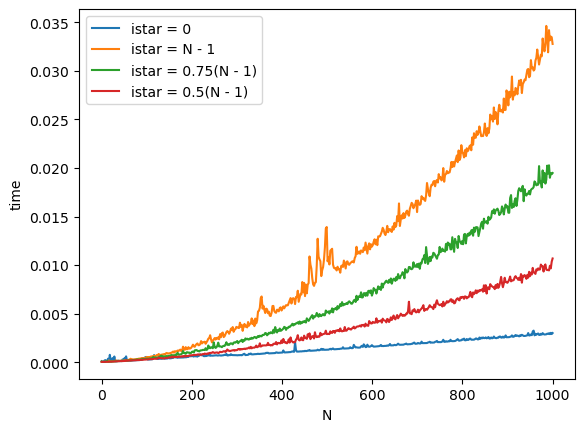

In [45]:
import numpy as np
times1 = part1_time(1000, 0)
times2 = part1_time(1000, 1)
times3 = part1_time(1000, 0.75)
times4 = part1_time(1000, 0.5)
fig, ax = plt.subplots(1, 1)
ax.plot(np.linspace(0, 1000, len(times1)), times1,  label = "istar = 0")
ax.plot(np.linspace(0, 1000, len(times2)), times2,  label = "istar = N - 1")
ax.plot(np.linspace(0, 1000, len(times3)), times3,  label = "istar = 0.75(N - 1)")
ax.plot(np.linspace(0, 1000, len(times4)), times4,  label = "istar = 0.5(N - 1)")
ax.legend(loc = "upper left")
plt.xlabel("N")
plt.ylabel("time")

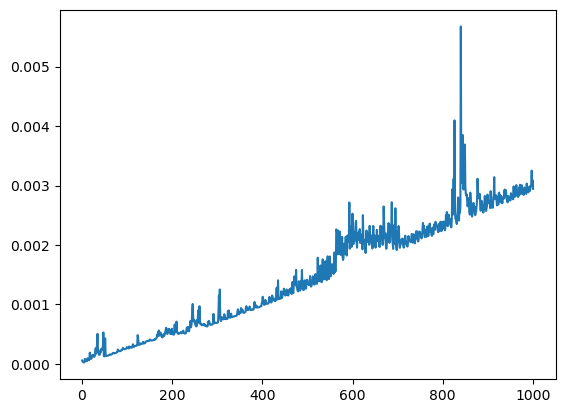

In [41]:
import time
fig, ax = plt.subplots(1, 1)
#fix istar as 0 and then as N-1
zeros = []
for i in range(1000):
    t1 = time.time()
    sorted = part1(np.random.randint(1, 1000, i), 0)
    t2 = time.time()
    zeros.append(t2 - t1)
x = np.linspace(1, 1000, 1000)
plt.plot(x, zeros)

In [88]:
#===== Code for Part 1=====#
def part1(Xin,istar):
    """
    Sort list of integers in non-decreasing order
    Input:
    Xin: List of N integers
    istar: integer between 0 and N-1 (0<=istar<=N-1)
    Output:
    X: Sorted list
    """ 
    X = Xin.copy() 
    for i,x in enumerate(X[1:],1):
        if i<=istar:
            ind = 0
            for j in range(i-1,-1,-1):
                if x>=X[j]:
                    ind = j+1
                    break                   
        else:
            a = 0
            b = i-1
            while a <= b:
                c = (a+b) // 2
                if X[c] < x:
                    a = c + 1
                else:
                    b = c - 1
            ind = a
        
        X[ind+1:i+1] = X[ind:i]
        X[ind] = x

    return X


def avgd_sample(N, coef,  n):
    #Function to take n number of samples and return the mean of them
    import numpy as np
    import time
    timer = 0
    for i in range(n):
        Xin = np.random.randint(1, 2*N, N)
        t1 = time.time()
        part1(Xin, int(coef * (N - 1)))
        t2 = time.time()
        timer += t2 - t1
    return timer/n


def part1_time(n):
    """Examine dependence of walltimes of part1 function on N and istar
        You may modify the input/output as needed.
    """

    #Add code here for part 1, question 2
    import numpy as np
    import matplotlib.pyplot as plt
    
    #plot1 - fixed istar = 0, N-1 and 2 values in between, with lots of values being simulated, taking means
    x = np.arange(10, 1000, 10)
    t_0 = []
    t_5 = []
    t_1 = []
    for length in x:
        t_0.append(avgd_sample(length, 0, n))
        t_5.append(avgd_sample(length, 0.5, n))
        t_1.append(avgd_sample(length, 1, n))

    t_100 = []
    t_500 = []
    t_1000 = []
    xx = np.arange(0, 1, 0.01)

    for coef in xx:
        t_100.append(avgd_sample(100, coef, n))
        t_500.append(avgd_sample(500, coef, n))
        t_1000.append(avgd_sample(1000, coef, n))


    fig, ax = plt.subplots(2, 2)
    fig.tight_layout(w_pad=2.5, h_pad=3.2)
    ax[0, 0].set_title('Figure 1')
    ax[0, 0].plot(x, t_0, label = 'istar = 0')
    ax[0, 0].plot(x, t_5, label = 'istar = (N-1)//2')
    ax[0, 0].plot(x, t_1, label = 'istar = N-1')
    ax[0, 0].set_xlabel("N")
    ax[0, 0].set_ylabel("Wall Time (s)")
    ax[0, 0].legend(loc = "upper left")
    ax[0, 1].set_title('Figure 2')
    ax[0, 1].plot(x*np.log(x), t_0, label = 'xstar = 0')
    ax[0, 1].set_xlabel("Nlog(N)")
    ax[0, 1].set_ylabel("Wall Time (s)")
    ax[0, 1].legend(loc = 'upper left')
    ax[1, 0].set_title('Figure 3')
    ax[1, 0].plot(x**2, t_1, label = 'istar = N-1')
    ax[1, 0].set_xlabel("N^2")
    ax[1, 0].set_ylabel("Wall Time (s)")
    ax[1, 0].legend(loc = 'upper left')
    ax[1, 1].set_title('Figure 4')
    ax[1, 1].plot(xx, t_100, label = 'N = 100')
    ax[1, 1].plot(xx, t_500, label = 'N = 500')
    ax[1, 1].plot(xx, t_1000, label = 'N = 1000')
    ax[1, 1].set_xlabel("istar/(N-1)")
    ax[1, 1].set_ylabel("Wall Time (s)")
    ax[1, 1].legend(loc = "upper left")

    
    return None #Modify if needed

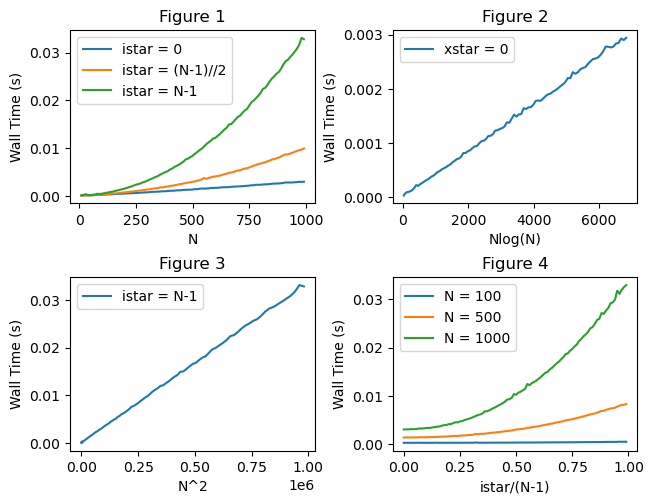

In [90]:
part1_time(100)

In [108]:
def part2(S,T,m):
    """Find locations in S of all length-m sequences in T
    Input:
    S,T: length-n and length-l gene sequences provided as strings

    Output:
    L: A list of lists where L[i] is a list containing all locations 
    in S where the length-m sequence starting at T[i] can be found.
   """
    #Size parameters
    n = len(S) 
    l = len(T) 
    
    L = [[] for i in range(l-m+1)] #use/discard as needed

    #Add code here for part 2, question 1
    #Covert strings S and T to base 4
    X = base_4_converter(S)
    Y = base_4_converter(T)
    
    #choose a prime (this prime can be any prime as we assume integer arithmetic takes constant time)
    q = 1871
    bm = (4 ** m ) % q
    #make hashes of all length-m strings in T using heval and Rabin-Karp
    hash_T = heval(Y[: m], 4, q)
    h_dict = {hash_T : [0]}
    for i in range(1, l - m + 1):
        hash_T = ((4 * hash_T - int(Y[i - 1]) * bm + int(Y[i + m - 1])) % q)
        if hash_T in h_dict:
            h_dict[hash_T].append(i)
        else:
            h_dict[hash_T] = [i]

    #Find hash of first m elements in S using heval
    hash_i = heval(X[:m], 4, q)

    #Compare the first m elements of S to all length-m substrings of T, adding to L if matching
    if hash_i in h_dict:
        for i in h_dict[hash_i]:
            if S[:m] == T[i:i + m]:
                L[i].append(0)

    #For the rest of the length-m  strings in S, update hash_i and compare to all hashes in T, adding to L if matching
    for i in range(1, n - m + 1):
        #Update the hash using Rabin-Karp
        hash_i = ((4 * hash_i - int(X[i-1]) * bm + int(X[i - 1 + m])) % q)
        #If the hash is in the dictionary of S length-m strings, then check for a hash collision and append to list.
        if hash_i in h_dict:
            for j in h_dict[hash_i]:
                if S[i:i + m] == T[j:j + m]:
                    L[j].append(i)

    return L


def base_4_converter(S):
    #Function to convert character string into base 4 numbers
    values = {}
    values['A'] = 0
    values['T'] = 1
    values['C'] = 2
    values['G'] = 3

    L = []
    for letter in S:
        L.append(values[letter])

    return L


def heval(L, Base, q):
    #Convert L to base-10 mod q where Base is original base of L
    f = 0
    for l in L[:-1]:
        f = Base * (l + f)
    
    h = (f + (L[-1])) % q
    return h

In [109]:
S = 'ATCGTACTAGTTATCGT'
T = 'ATCGT'
m = 3
out = part2(S,T,m)

#Large gene sequence from which S and T test sequences can be constructed
infile = open("test_sequence.txt") #file from lab 3
sequence = infile.read()
infile.close()

In [110]:
out

[[0, 12], [1, 13], [2, 14]]

In [148]:
def part2q1(y0,tf=1,Nt=5000):
    """
    Part 2, question 1
    Simulate system of n nonlinear ODEs

    Input:
    y0: Initial condition, size n array
    tf,Nt: Solutions are computed at Nt time steps from t=0 to t=tf (see code below)
    seed: ensures same intial condition is generated with each simulation
    Output:
    tarray: size Nt+1 array
    yarray: Nt+1 x n array containing y at
            each time step including the initial condition.
    """
    import numpy as np
    
    #Set up parameters, arrays
    n = y0.size
    tarray = np.linspace(0,tf,Nt+1)
    yarray = np.zeros((Nt+1,n))
    yarray[0,:] = y0
    beta = 10000/np.pi**2
    alpha = 1-2*beta
    
    def RHS(t,y):
        """
        Compute RHS of model
        """        
        dydt = np.zeros_like(y)
        for i in range(1,n-1):
            dydt[i] = alpha*y[i]-y[i]**3 + beta*(y[i+1]+y[i-1])
        
        dydt[0] = alpha*y[0]-y[0]**3 + beta*(y[1]+y[-1])
        dydt[-1] = alpha*y[-1]-y[-1]**3 + beta*(y[0]+y[-2])

        return dydt 


    #Compute numerical solutions
    dt = tarray[1]
    for i in range(Nt):
        yarray[i+1,:] = yarray[i,:]+dt*RHS(0,yarray[i,:])

    return tarray,yarray

def part2q1new(y0,tf=40,Nt=800):
    """
    Part 2, question 1
    Simulate system of n nonlinear ODEs

    Input:
    y0: Initial condition, size n array
    tf,Nt: Solutions are computed at Nt time steps from t=0 to t=tf (see code below)
    seed: ensures same intial condition is generated with each simulation
    Output:
    tarray: size Nt+1 array
    yarray: Nt+1 x n array containing y at
            each time step including the initial condition.
    """
    from scipy.integrate import solve_ivp
    #Set up parameters, arrays
    n = y0.size
    tarray = np.linspace(0,tf,Nt+1)
    yarray = np.zeros((Nt+1,n))
    yarray[0,:] = y0
    beta = 10000/np.pi**2
    alpha = 1-2*beta
    
    def RHS(t,y):
        """
        Compute RHS of model using vector operations rather than an elementwise approach
        """        
        dydt = np.zeros_like(y)
        dydt[1:-1] = alpha*y[1:-1]-y[1:-1]**3 + beta*(y[2:]+y[:-2])
        dydt[0] = alpha*y[0]-y[0]**3 + beta*(y[1]+y[-1])
        dydt[-1] = alpha*y[-1]-y[-1]**3 + beta*(y[0]+y[-2])
    
        return dydt 


    #Compute numerical solutions
    sol = solve_ivp(RHS, (0, tf), y0, 'BDF', t_eval = tarray, vectorised = True, rtol=1e-7, atol=1e-7)

    return sol.t, sol.y.T

In [150]:
iv1, iv2 = np.load('project2.npy')

In [151]:
times, y_vals = part2q1new(iv1)

/Users/calam/Year 3/pers_venv/lib/python3.11/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `vectorised`.
  warn("The following arguments have no effect for a chosen solver: {}."


In [153]:
def part2q1newanalyze(y0, tf=40, Nt = 800):
    times, y_vals = part2q1new(y0, tf, Nt)
    m, n = np.shape(y_vals)
    for i in range(m):
        plt.plot(times, y_vals[i])
    
    return None

In [236]:
def part2q2(tf=40, Nt=800): #add input variables if needed
    """
    Add code used for part 2 question 2.
    Code to load initial conditions is included below
    """
    import scipy as sp
    import numpy as np
    import matplotlib.pyplot as plt
    
    data = np.load('project2.npy') #modify/discard as needed
    y0A = data[0,:] #first initial condition
    y0B = data[1,:] #second initial condition

    #Add code here

    tarray = np.linspace(0, tf, Nt+1)

    times_0, y_vals_0 = part2q1new(y0A, tf, Nt)
    times_1, y_vals_1 = part2q1new(y0B, tf, Nt)    
        
    def RHS(y):
            """
            Compute RHS of model using vector operations rather than an elementwise approach
            """  
            beta = 10000 / np.pi**2
            alpha = 1 - 2 * beta      
            dydt = np.zeros_like(y)
            dydt[1:-1] = alpha*y[1:-1]-y[1:-1]**3 + beta*(y[2:]+y[:-2])
            dydt[0] = alpha*y[0]-y[0]**3 + beta*(y[1]+y[-1])
            dydt[-1] = alpha*y[-1]-y[-1]**3 + beta*(y[0]+y[-2])

            return dydt 

    def pertubation_analysis(t, y0):
        beta = 10000 / np.pi ** 2
        alpha = 1 - 2 * beta
        solution = sp.optimize.fsolve(RHS, y0)
        main = np.diag(alpha - 3 * solution ** 2, k = 0)
        off_above = np.diag(beta * np.ones(999), k = 1)
        off_below = np.diag(beta * np.ones(999), k = -1)
        linearised = main + off_above + off_below
        linearised[0, -1] = beta
        linearised[-1, 0] = beta
        evals, evecs = np.linalg.eigh(linearised)
        constants = np.linalg.solve(evecs, y0)
        times = np.tile(t, (1000, 1))
        lambdat = np.dot(np.diag(evals), times)
        etolamt = np.exp(lambdat)
        pertubations = evecs @ (constants[:, None] * etolamt)
        return pertubations.T, max(evals), min(evals)
    

    pertubations_A, max_A, min_A = pertubation_analysis(tarray, y0A)
    pertubations_B, max_B, min_B = pertubation_analysis(tarray, y0B)

    fig, ax = plt.subplots(2, 2, figsize=(8, 6))
    fig.tight_layout(w_pad=4.8, h_pad=3.2)
    ax[0, 0].plot(times_0, y_vals_0)
    ax[0, 0].set_title('Solution to IVP from y0A')
    ax[0, 0].set_xlabel('Time')
    ax[0, 0].set_ylabel('y_i')
    ax[0, 1].plot(times_1, y_vals_1)
    ax[0, 1].set_title('Solution to IVP from y0B')
    ax[0, 1].set_xlabel('Time')
    ax[0, 1].set_ylabel('y_i')
    ax[1, 0].plot(tarray, pertubations_A)
    ax[1, 1].plot(tarray, pertubations_B)
    #ax[1, 0].set_yticks([-0.010, -0.005, 0.000, 0.005, 0.010])
    ax[1, 0].set_title('Evolution of Pertubations from y0A')
    ax[1, 0].set_xlabel('Time')
    ax[1, 0].set_ylabel('Pertubation from Equilibrium')
    ax[1, 1].set_title('Evolution of Pertubations from y0B')
    ax[1, 1].set_xlabel('Time')
    ax[1, 1].set_ylabel('Pertubation from Equilibrium')
    
    return [(min_A, max_A), (min_B, max_B)] #modify as needed

[(-4052.6762670720245, 0.35825346599066343),
 (-4054.776487342712, 2.1646667830053654e-08)]

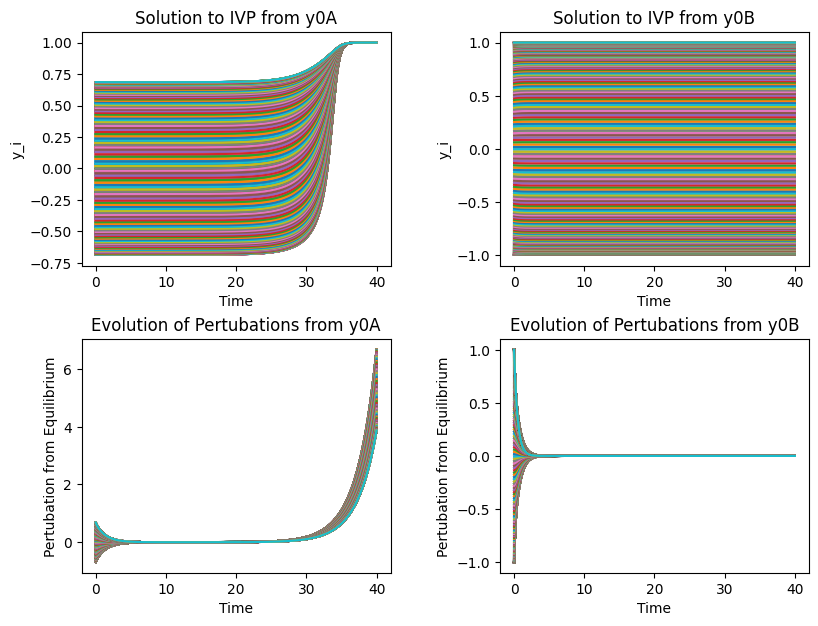

In [237]:
part2q2()

In [ ]:
def searchPKR2(G,s,x):
    """Input:
    G: weighted NetworkX graph with n nodes (numbered as 0,1,...,n-1)
    s: an integer corresponding to a node in G
    x: an integer corresponding to a node in G
    Output: Should produce equivalent output to searchGPT given same input
    """

    #Add code here
    import heapq
    Fdict = {}
    Mdict = {}
    Mlist = []
    dmin = float('inf')
    n = len(G)
    G.add_node(n)
    heapq.heappush(Mlist,[0,s])
    Mdict[s]=Mlist[0]
    parents = {}

    while len(Mlist)>0:
        dmin,nmin = heapq.heappop(Mlist)
        if nmin == x:
            path = []
            #return dmin and the path if target node is found
            while nmin in parents:
                nmin = parents[nmin]
                path.append(nmin)
            path.reverse()
            path.append(x)
            return dmin, path

        Fdict[nmin] = dmin

        for m,en,wn in G.edges(nmin,data='weight'):
            if en in Fdict:
                pass
            elif en in Mdict:
                dcomp = max(dmin,wn)
                if dcomp<Mdict[en][0]:
                    l = Mdict.pop(en)
                    l[1] = nmin
                    lnew = [dcomp,en]
                    heapq.heappush(Mlist,lnew)
                    Mdict[en]=lnew
                    parents[en] = nmin #update the path, adding the new node
            else:
                dcomp = max(dmin,wn)
                lnew = [dcomp,en]
                heapq.heappush(Mlist, lnew)
                Mdict[en] = lnew
                parents[en] = nmin #update path, adding new node
    #infinity if no path is found
    return float('inf'), []

In [254]:
import heapq
def searchGPT(graph, source, target):
    # Initialize distances with infinity for all nodes except the source
    distances = {node: float('inf') for node in graph}
    distances[source] = 0

    # Initialize a priority queue to keep track of nodes to explore
    priority_queue = [(0, source)]  # (distance, node)

    # Initialize a dictionary to store the parent node of each node in the shortest path
    parents = {}

    while priority_queue:
        current_distance, current_node = heapq.heappop(priority_queue)

        # If the current node is the target, reconstruct the path and return it
        if current_node == target:
            path = []
            while current_node in parents:
                path.insert(0, current_node)
                current_node = parents[current_node]
            path.insert(0, source)
            return current_distance,path

        # If the current distance is greater than the known distance, skip this node
        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in graph[current_node].items():
            distance = max(distances[current_node], weight['weight'])
            if distance < distances[neighbor]:
                distances[neighbor] = distance
                parents[neighbor] = current_node
                heapq.heappush(priority_queue, (distance, neighbor))

    return float('inf'), []  # No path exists

(3, [1, 2, 9, 5])
(3, [1, 2, 9, 5])


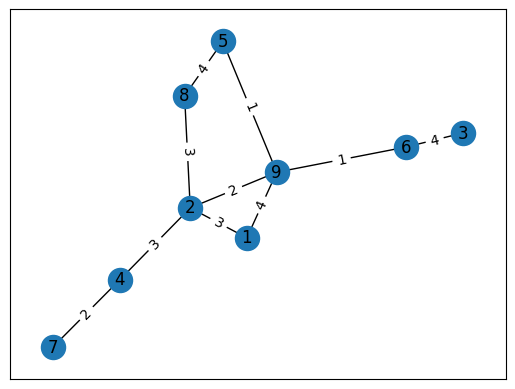

In [255]:
import networkx as nx
e = [(np.random.randint(1, 10), np.random.randint(1, 10), np.random.randint(1, 5)) for _ in range(10)]
e.append((1, 2, 3))
G = nx.Graph()
G.add_weighted_edges_from(e)

labels = nx.get_edge_attributes(G,'weight')
pos = nx.spring_layout(G)
nx.draw_networkx(G,pos)
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

print(searchGPT(G, 1, 5))
print(searchPKR2(G, 1, 5))

TypeError: 'bool' object is not callable

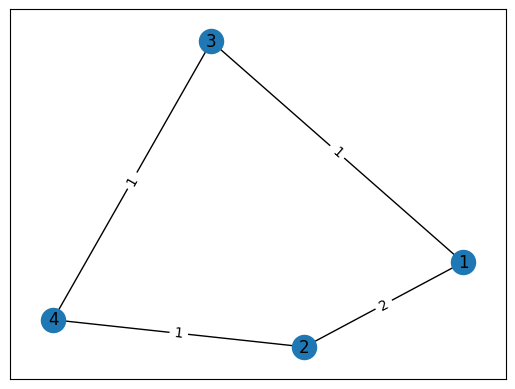

In [256]:
import matplotlib.pyplot as plt
e = [(1, 2, 2), (1, 3, 1), (3, 4, 1), (4, 2, 1)]
G = nx.Graph()
G.add_weighted_edges_from(e)
labels = nx.get_edge_attributes(G,'weight')
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, )
nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
plt.box(False)

In [257]:
for _ in range(1000):
    e = [(np.random.randint(1, 10), np.random.randint(1, 10), np.random.randint(1, 5)) for _ in range(10)]
    e.append((1, 2, 3))
    G = nx.Graph()
    G.add_weighted_edges_from(e)
    n = np.random.randint(2, 10)

    d1, l1 = searchGPT(G, 1, n)
    d2, l2 = searchPKR2(G, 1, n)

    correct = True

    if d1 != d2 or l1 != l2:
        print(d1, l1)
        print(d2, l2)
        correct = False


if correct:
    print('Part 1 Q2 is correct!')


Part 1 Q2 is correct!


In [12]:
beta = 10000 / np.pi**2
alpha = 1-2*beta

In [23]:
import scipy as sp
main = np.ones(1000)
data = np.array([(alpha)*main, beta*main, beta*main])
offsets = np.array([0, -1, 1])
diag_array = sp.sparse.dia_array((data, offsets), shape = (1000, 1000))
row = np.array([0, 999])
col = np.array([999, 0])
data = np.array([beta, beta])
coo_array = sp.sparse.coo_array((data, (row, col)), shape = (1000, 1000))

In [24]:
linearised = diag_array + coo_array

In [25]:
eigenvalues, eigenvectors = np.linalg.eig(linearised.toarray())

In [26]:
len(eigenvalues)

1000

In [27]:
np.shape(linearised.toarray())

(1000, 1000)

In [28]:
len(np.unique(eigenvalues))

995

In [29]:
import time
t1 = time.time()
vals, vecs = sp.sparse.linalg.eigsh(linearised.toarray(), k=1000)
t2 = time.time()
t2-t1, len(vals)

(0.27524471282958984, 1000)

In [30]:
t3 = time.time()
vals2, vec2 = np.linalg.eig(linearised.toarray())
t4 = time.time()
t4-t3

1.5217068195343018

In [55]:
t5 = time.time()
evals2, evecs2 = sp.sparse.linalg.eigsh(linearised, k = 1)
t6 = time.time()
t6-t5

0.1844470500946045

In [32]:
t7 = time.time()
evals3, evecs3 = np.linalg.eigh(linearised.toarray())
t8 = time.time()
t8-t7

0.3690621852874756

In [33]:
def sprandsym(n):
    rvs = sp.stats.norm().rvs
    X = sp.sparse.random(n, n, data_rvs=rvs)
    upper_X = sp.sparse.triu(X) 
    result = upper_X + upper_X.T - sp.sparse.diags(X.diagonal())
    return result

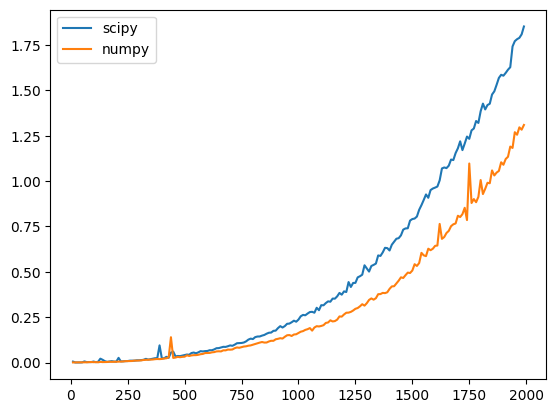

In [58]:
import scipy as sp
import numpy as np
import time
import networkx as nx
import matplotlib.pyplot as plt
N = 2000
times_sp = []
times_np = []
sizes = np.arange(10, N, 10)
for i in sizes:
    M = sprandsym(i)
    t1 = time.time()
    v1, v2 = sp.linalg.eigh(M.toarray())
    t2 = time.time()
    v1, v2 = np.linalg.eigh(M.toarray())
    t3 = time.time()
    times_sp.append(t2-t1)
    times_np.append(t3-t2)
plt.plot(sizes, times_sp, label = 'scipy')
plt.plot(sizes, times_np, label = 'numpy')
plt.legend(loc = 'upper left')

In [206]:
def part2q3(tf=10,Nt=1000,mu=0.2,seed=1):
    """
    Input:
    tf,Nt: Solutions are computed at Nt time steps from t=0 to t=tf
    mu: model parameter
    seed: ensures same random numbers are generated with each simulation

    Output:
    tarray: size Nt+1 array
    X size n x Nt+1 array containing solution
    """

    #Set initial condition
    y0 = np.array([0.3,0.4,0.5])
    np.random.seed(seed)
    n = y0.size #must be n=3
    Y = np.zeros((Nt+1,n)) #may require substantial memory if Nt, m, and n are all very large
    Y[0,:] = y0

    Dt = tf/Nt
    tarray = np.linspace(0,tf,Nt+1)
    beta = 0.04/np.pi**2
    alpha = 1-2*beta

    def RHS(t,y):
        """
        Compute RHS of model
        """
        dydt = np.array([0.,0.,0.])
        dydt[0] = alpha*y[0]-y[0]**3 + beta*(y[1]+y[2])
        dydt[1] = alpha*y[1]-y[1]**3 + beta*(y[0]+y[2])
        dydt[2] = alpha*y[2]-y[2]**3 + beta*(y[0]+y[1])

        return dydt 

    dW= np.sqrt(Dt)*np.random.normal(size=(Nt,n))

    #Iterate over Nt time steps
    for j in range(Nt):
        y = Y[j,:]
        F = RHS(0,y)
        Y[j+1,0] = y[0]+Dt*F[0]+mu*dW[j,0]
        Y[j+1,1] = y[1]+Dt*F[1]+mu*dW[j,1]
        Y[j+1,2] = y[2]+Dt*F[2]+mu*dW[j,2]

    return tarray,Y


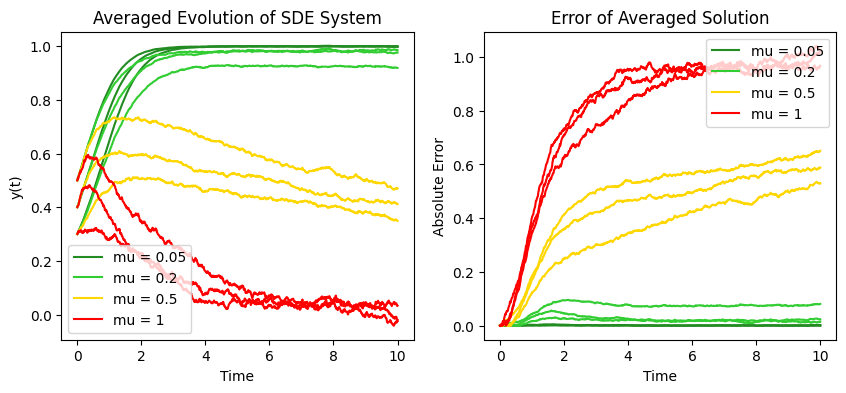

In [356]:
def part2q3Analyze(tf=10,Nt=1000,mus=[0.05, 0,2, 0.5, 1], n = 1000): #add input variables as needed
    """
    Code for part 2, question 3
    """

    #add code for generating figures and any other relevant calculations here
    colours = ['forestgreen', 'limegreen', 'gold', 'red']
 
    t, true_y = part2q3(mu = 0)

    fig, ax = plt.subplots(1, 2, figsize = (10, 4))

    for i, mu in enumerate(mus):
        y = np.zeros((Nt + 1, 3))
        for seed in range(n):
            t, Y = part2q3(tf, Nt, mu, seed)
            y += Y
        
        y_bar = y/n
        errors = np.abs(y_bar - true_y)


        ax[0].plot(t, y_bar[:, 0], colours[i], label = f'mu = {mu}')
        ax[0].plot(t, y_bar[:, 1], colours[i])
        ax[0].plot(t, y_bar[:, 2], colours[i])
        ax[1].plot(t, errors[:, 0], colours[i], label = f'mu = {mu}')
        ax[1].plot(t, errors[:, 1], colours[i])
        ax[1].plot(t, errors[:, 2], colours[i])

    ax[0].legend(loc = 'lower left')
    ax[0].set_xlabel('Time')
    ax[0].set_ylabel('y(t)')
    ax[0].set_title('Averaged Evolution of SDE System')
    ax[1].legend(loc = 'upper right')
    ax[1].set_xlabel('Time')
    ax[1].set_ylabel('Absolute Error')
    ax[1].set_title('Error of Averaged Solution')

    
    return None #modify as needed
part2q3Analyze(mus=[0.05, 0.2, 0.5, 1], n = 1000)

In [349]:
mus = [0.05, 0.2, 0.5, 1]
n = 1000
for i, mu in enumerate(mus):
    y = np.zeros((1001, 3))
    for seed in range(n):
        t, Y = part2q3(10, 1000, mu, seed)
        y += Y
    y_bar = y/n

In [352]:
np.shape(y_bar[:, 0])

(1001,)

In [257]:
def part2q1new(y0,tf=40,Nt=800,beta=10000/np.pi**2):
    """
    Part 2, question 1
    Simulate system of n nonlinear ODEs

    Input:
    y0: Initial condition, size n array
    tf,Nt: Solutions are computed at Nt time steps from t=0 to t=tf (see code below)
    seed: ensures same intial condition is generated with each simulation
    Output:
    tarray: size Nt+1 array
    yarray: Nt+1 x n array containing y at
            each time step including the initial condition.
    """
    from scipy.integrate import solve_ivp
    #Set up parameters, arrays
    n = y0.size
    tarray = np.linspace(0,tf,Nt+1)
    yarray = np.zeros((Nt+1,n))
    yarray[0,:] = y0
    alpha = 1-2*beta
    
    def RHS(t,y):
        """
        Compute RHS of model using vector operations rather than an elementwise approach
        """        
        dydt = np.zeros_like(y)
        dydt[1:-1] = alpha*y[1:-1]-y[1:-1]**3 + beta*(y[2:]+y[:-2])
        dydt[0] = alpha*y[0]-y[0]**3 + beta*(y[1]+y[-1])
        dydt[-1] = alpha*y[-1]-y[-1]**3 + beta*(y[0]+y[-2])
    
        return dydt 


    #Compute numerical solutions
    sol = solve_ivp(RHS, (0, tf), y0, 'BDF', t_eval = tarray, vectorised = True, rtol=1e-7, atol=1e-7)

    return sol.t, sol.y.T



/Users/calam/Year 3/pers_venv/lib/python3.11/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `vectorised`.
  warn("The following arguments have no effect for a chosen solver: {}."


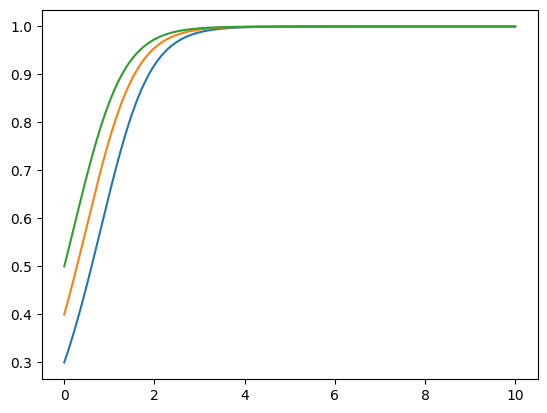

In [212]:
t, y = part2q1new(np.array([0.3,0.4,0.5]), 10, 1000, beta=0.04/np.pi**2)
plt.plot(t, y)

In [218]:
y = []
seeds = np.arange(1, n, 1)
for val in seeds:
    t, y_i = part2q3(val, tf=10, Nt=1000)
    y.append(y_i)
y_bar = np.average(y, axis = 0)
plt.plot(t, y_bar)

TypeError: part2q3() got multiple values for argument 'tf'

In [262]:
def measure_convergence_over_mu(mu_values, tf=10, Nt=1000, seed=1, tolerance=0.01):
    """
    Measure how quickly solutions approach 1 for varying mu values.

    Parameters:
    mu_values: List of mu values to iterate over.
    tf, Nt, seed: Parameters for the simulation.
    tolerance: Tolerance level for convergence.

    Returns:
    convergence_times_over_mu: Dictionary containing convergence times for each mu value.
    """

    convergence_times_over_mu = {}

    for mu in mu_values:
        tarray, Y = part2q3(tf=tf, Nt=Nt, mu=mu, seed=seed)
        convergence_times = measure_convergence(tarray, Y, tolerance)
        convergence_times_over_mu[f'mu={mu}'] = convergence_times

    return convergence_times_over_mu

TypeError: 'dict_values' object is not subscriptable

In [285]:
def measure_convergence_over_mu(mu_values, tf=10, Nt=1000, seed=1, tolerance=0.01, max_convergence_time=float('inf')):
    """
    Measure how quickly solutions approach 1 for varying mu values.

    Parameters:
    mu_values: List of mu values to iterate over.
    tf, Nt, seed: Parameters for the simulation.
    tolerance: Tolerance level for convergence.
    max_convergence_time: Maximum allowed convergence time for a mu value.

    Returns:
    valid_mu_convergence_times: List containing convergence times for mu values that meet the criteria.
    """

    valid_mu_convergence_times = []

    for mu in mu_values:
        tarray, Y = part2q3(tf=tf, Nt=Nt, mu=mu, seed=seed)

        # Measure convergence directly within the loop
        convergence_times = []
        for component in range(Y.shape[1]):
            for time, value in zip(tarray, Y[:, component]):
                if abs(value - 1) < tolerance:
                    convergence_times.append(time)
                    break

        # Check if any component converged within the specified time
        if min(convergence_times, default=float('inf')) <= max_convergence_time:
            valid_mu_convergence_times.append((mu, convergence_times))

    return valid_mu_convergence_times



In [288]:
mu_values = np.linspace(0, 1, 50)
valid_mu_convergence_times = measure_convergence_over_mu(mu_values, max_convergence_time=20.0)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (50, 2) + inhomogeneous part.

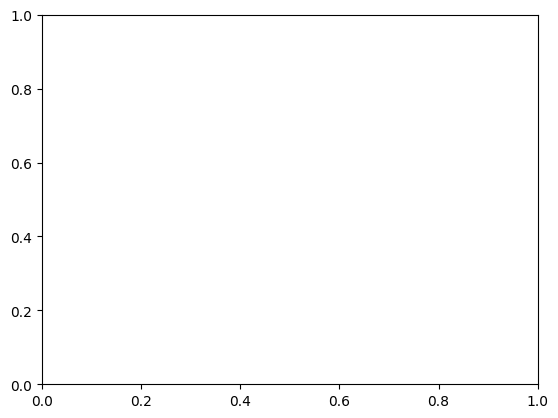

In [290]:
plt.plot(mu_values, valid_mu_convergence_times)

In [291]:
np.shape(valid_mu_convergence_times)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (50, 2) + inhomogeneous part.

In [292]:
def part2q1new(y0,tf=40,Nt=800):
    """
    Part 2, question 1
    Simulate system of n nonlinear ODEs

    Input:
    y0: Initial condition, size n array
    tf,Nt: Solutions are computed at Nt time steps from t=0 to t=tf (see code below)
    seed: ensures same intial condition is generated with each simulation
    Output:
    tarray: size Nt+1 array
    yarray: Nt+1 x n array containing y at
            each time step including the initial condition.
    """
    from scipy.integrate import solve_ivp
    #Set up parameters, arrays
    n = y0.size
    tarray = np.linspace(0,tf,Nt+1)
    yarray = np.zeros((Nt+1,n))
    yarray[0,:] = y0
    beta = 10000/np.pi**2
    alpha = 1-2*beta
    
    def RHS(t,y):
        """
        Compute RHS of model using vector operations rather than an elementwise approach
        """        
        dydt = np.zeros_like(y)
        dydt[1:-1] = alpha*y[1:-1]-y[1:-1]**3 + beta*(y[2:]+y[:-2])
        dydt[0] = alpha*y[0]-y[0]**3 + beta*(y[1]+y[-1])
        dydt[-1] = alpha*y[-1]-y[-1]**3 + beta*(y[0]+y[-2])
    
        return dydt 


    #Compute numerical solutions
    sol = solve_ivp(RHS, (0, tf), y0, 'BDF', t_eval = tarray, vectorised = True, rtol=1e-7, atol=1e-7)

    return sol.t, sol.y.T #return t values and y values from solution, transposing them so they plot correctly

In [296]:
data = np.load('project2.npy')[0, :]
t, y = part2q1new(data)

/Users/calam/Year 3/pers_venv/lib/python3.11/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `vectorised`.
  warn("The following arguments have no effect for a chosen solver: {}."


In [298]:
def part2q2(tf=40, Nt=800): #add input variables if needed
    """
    Add code used for part 2 question 2.
    Code to load initial conditions is included below
    """
    import scipy as sp
    import numpy as np
    import matplotlib.pyplot as plt
    
    data = np.load('project2.npy') #modify/discard as needed
    y0A = data[0,:] #first initial condition
    y0B = data[1,:] #second initial condition

    #Add code here

    tarray = np.linspace(0, tf, Nt+1) #initialise time stamps to compute solutions for

    times_0, y_vals_0 = part2q1new(y0A, tf, Nt) #compute solutions to ODE using function part2q1new for both initial conditions
    times_1, y_vals_1 = part2q1new(y0B, tf, Nt)    
        
    def RHS(y):
            """
            Compute RHS of model using vector operations rather than an elementwise approach
            """  
            beta = 10000 / np.pi**2
            alpha = 1 - 2 * beta      
            dydt = np.zeros_like(y)
            dydt[1:-1] = alpha*y[1:-1]-y[1:-1]**3 + beta*(y[2:]+y[:-2])
            dydt[0] = alpha*y[0]-y[0]**3 + beta*(y[1]+y[-1])
            dydt[-1] = alpha*y[-1]-y[-1]**3 + beta*(y[0]+y[-2])

            return dydt 

    def pertubation_analysis(t, y0):
        beta = 10000 / np.pi ** 2
        alpha = 1 - 2 * beta
        solution = sp.optimize.root(RHS, y0) #find the equilibrium of RHS using initial guess y0
        main = np.diag(alpha - 3 * solution.x ** 2, k = 0) #construct linearised matrix using numpy diagonals
        off_above = np.diag(beta * np.ones(999), k = 1)
        off_below = np.diag(beta * np.ones(999), k = -1)
        linearised = main + off_above + off_below
        linearised[0, -1] = beta
        linearised[-1, 0] = beta
        evals, evecs = np.linalg.eigh(linearised) #find eigenvectors and eigenvalues
        constants = np.linalg.solve(evecs, y0) #use solve method to find constants of ODE so we can construct solution
        times = np.tile(t, (1000, 1)) #construct solution
        lambdat = np.dot(np.diag(evals), times)
        etolamt = np.exp(lambdat)
        pertubations = evecs @ (constants[:, None] * etolamt)
        return pertubations.T, max(evals), min(evals) #return pertubation evolution alongside min and max eigenvalues
    

    pertubations_A, max_A, min_A = pertubation_analysis(tarray, y0A) #implement pertubation analysis function
    pertubations_B, max_B, min_B = pertubation_analysis(tarray, y0B)

    fig, ax = plt.subplots(2, 2, figsize=(8, 6))
    fig.tight_layout(w_pad=4.8, h_pad=3.2)
    ax[0, 0].plot(times_0, y_vals_0) #plot solution for initial condition A
    ax[0, 0].set_title('Solution to IVP from y0A')
    ax[0, 0].set_xlabel('Time')
    ax[0, 0].set_ylabel('y_i')
    ax[0, 1].plot(times_1, y_vals_1) #plot solution for initial condition A
    ax[0, 1].set_title('Solution to IVP from y0B')
    ax[0, 1].set_xlabel('Time')
    ax[0, 1].set_ylabel('y_i')
    ax[1, 0].plot(tarray, pertubations_A) #plot pertubation plots agains time for both initial conditions
    ax[1, 1].plot(tarray, pertubations_B)
    ax[1, 0].set_title('Evolution of Pertubations from y0A')
    ax[1, 0].set_xlabel('Time')
    ax[1, 0].set_ylabel('Pertubation from Equilibrium')
    ax[1, 1].set_title('Evolution of Pertubations from y0B')
    ax[1, 1].set_xlabel('Time')
    ax[1, 1].set_ylabel('Pertubation from Equilibrium')
    
    return [(min_A, max_A), (min_B, max_B)] #return smallest and largest eigenvalues from both initial conditions for analysis

/Users/calam/Year 3/pers_venv/lib/python3.11/site-packages/scipy/integrate/_ivp/common.py:39: UserWarning: The following arguments have no effect for a chosen solver: `vectorised`.
  warn("The following arguments have no effect for a chosen solver: {}."


[(-4052.6762670720245, 0.35825346599066343),
 (-4054.776487342712, 2.1646667830053654e-08)]

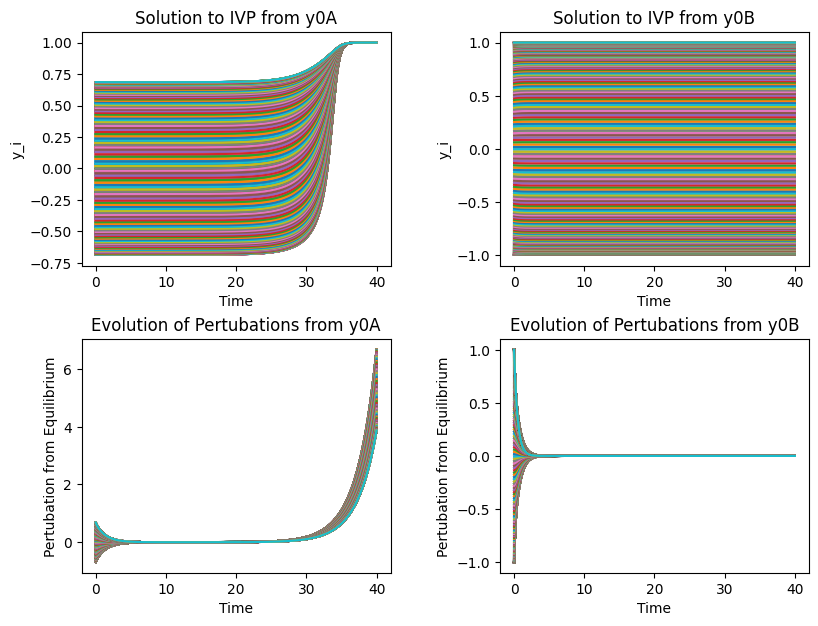

In [299]:
part2q2()